# Sleep

In this report, I will analyse the sleep75 dataset. I will focus on sleep data and explore its correlation with other variables from the analysed set.

First, I will import the dataset and convert it into a workable form

In [2]:
import pandas as pd

def read_column_names(txt_path):
    names = []
    with open(txt_path, "r") as f:
        lines = [line.rstrip() for line in f]
    for line in lines[1:]:
        if line.strip().startswith("Obs:"):
            break
        if not line.strip():
            continue
        names.extend(line.split())
    return names

sleep75_cols = read_column_names("SLEEP75_description.txt")
sleep75_df   = pd.read_csv("sleep75.csv", sep=";", header=None, names=sleep75_cols)

Our dataset looks like this:

In [3]:
sleep75_df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0,0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,"7,070004",1024
1,31,0,2,0,0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,"1,429999",961
2,44,0,3,0,0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,"20,53",1936
3,30,0,4,0,0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,"9,619998",900
4,64,0,5,0,0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,"2,75",4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,"0,182331","0,030075",12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,.,2025
702,34,0,703,"0,182331","0,030075",10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,.,1156
703,37,0,704,"0,182331","0,030075",12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,.,1369
704,54,0,705,"0,182331","0,030075",17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,.,2916


We can see many columns with ambiguous names - I'll paste their exact meaning below. Some of the data is missing, some of it has an unsuitable datatype. In next steps, I will clean and impute some data.

### Meaning of columns in sleep75_df:

This dataframe shows statistics for 1975

1. age -                     in years
2. black -                   = 1 if black
3. case -                    identifier
4. clerical -                 = 1 if clerical worker
5. construc -                = 1 if construction worker
6. educ -                    years of schooling
7. earns74 -                  total earnings, 1974
8. gdhlth -                   = 1 if in good or excellent health
9. inlf -                    = 1 if in labor force
10. leis1 -                  sleep - totwrk
11. leis2 -                  slpnaps - totwrk
12. leis3 -                  rlxall - totwrk
13. smsa -                   = 1 if live in smsa
14. lhrwage -                 log hourly wage
15. lothinc -                log othinc, unless othinc < 0
16. male -                   = 1 if male
17. marr -                    = 1 if married
18. prot -                    = 1 if Protestant
19. rlxall -                  slpnaps + personal activs
20. selfe -                   = 1 if self employed
21. sleep -                  mins sleep at night, per week
22. slpnaps -                 mins sleep, including naps, per week
23. south -                  = 1 if live in south
24. spsepay -                spousal wage income
25. spwrk75 -                = 1 if spouse works
26. totwrk -                 mins worked per week
27. union -                  = 1 if belong to union
28. worknrm -                mins work main job
29. workscnd -               mins work second job
30. exper -                  age - educ - 6
31. yngkid -                 = 1 if children < 3 present
32. yrsmarr -                years married
33. hrwage -                 hourly wage
34. agesq -                  age^2


In [4]:
sleep75_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       706 non-null    int64 
 1   black     706 non-null    int64 
 2   case      706 non-null    int64 
 3   clerical  706 non-null    object
 4   construc  706 non-null    object
 5   educ      706 non-null    int64 
 6   earns74   706 non-null    int64 
 7   gdhlth    706 non-null    int64 
 8   inlf      706 non-null    int64 
 9   leis1     706 non-null    int64 
 10  leis2     706 non-null    int64 
 11  leis3     706 non-null    int64 
 12  smsa      706 non-null    int64 
 13  lhrwage   706 non-null    object
 14  lothinc   706 non-null    object
 15  male      706 non-null    int64 
 16  marr      706 non-null    int64 
 17  prot      706 non-null    int64 
 18  rlxall    706 non-null    int64 
 19  selfe     706 non-null    int64 
 20  sleep     706 non-null    int64 
 21  slpnaps   706 no

We can see that some columns that should have a numeric datatype have an 'object' data type. I'll convert them to actual floats

In [5]:
float_columns1 = ['lhrwage', 'hrwage', 'lothinc']

df_fixed = sleep75_df.copy()
for col in float_columns1:
    s = df_fixed[col].astype(str).str.replace(',', '.', regex=False)
    df_fixed[col] = pd.to_numeric(s, errors='coerce')

for col in df_fixed.columns:
    if df_fixed[col].dtype == 'object':
        df_fixed[col] = pd.to_numeric(df_fixed[col], errors='coerce')

negative_counts = (df_fixed < 0).sum() # only lhrwage contains negative values, likely because hrwage was between 0 and 1, which is why I won't be changing that

min_cols = ['leis1', 'leis2', 'leis3', 'rlxall', 'sleep', 'slpnaps', 'totwrk', 'worknrm', 'workscnd']

for col in min_cols:
    df_fixed[col] = (df_fixed[col] / 60).round(2) # converting mins per week to hours per week



Then I'll check for negative values. We can see that only lhrwage contains negative values, likely because hrwage was between 0 and 1, which is why I won't be changing that.

In [6]:
negative_counts = (df_fixed < 0).sum() 
print(negative_counts)

age          0
black        0
case         0
clerical     0
construc     0
educ         0
earns74      0
gdhlth       0
inlf         0
leis1        0
leis2        0
leis3        0
smsa         0
lhrwage     10
lothinc      0
male         0
marr         0
prot         0
rlxall       0
selfe        0
sleep        0
slpnaps      0
south        0
spsepay      0
spwrk75      0
totwrk       0
union        0
worknrm      0
workscnd     0
exper        0
yngkid       0
yrsmarr      0
hrwage       0
agesq        0
dtype: int64


We can see that the hourly wage data for some of the workers is missing, due to the fact that they do not work. For the sake of the analysis, I will create a separate dataframe for workers only, where I will drop the rows with missing values for this column. But first, I will convert some of the numeric columns to booleans.

In [7]:
bool_columns1 = ['black', 'clerical', 'construc', 'gdhlth', 'inlf', 'smsa', 'male', 'marr', 'prot', 'selfe', 'south', 'spwrk75', 'union', 'yngkid']
df_bool = df_fixed.copy()
for col in bool_columns1 :
    df_bool[col] = (df_bool[col] == 1)

In [8]:
df_copy = df_bool.copy()
df_workers = df_copy.dropna()

Our dataset for workers now looks like this.

In [9]:
df_workers

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,False,1,False,False,12,0,False,True,58.82,...,False,57.30,False,57.30,0.0,14,False,13,7.070004,1024
1,31,False,2,False,False,14,9500,True,True,35.67,...,False,83.67,False,83.67,0.0,11,False,0,1.429999,961
2,44,False,3,False,False,17,42500,True,True,76.58,...,True,46.92,False,46.92,0.0,21,False,0,20.530000,1936
3,30,False,4,False,False,12,42500,True,True,53.52,...,True,63.10,False,63.10,0.0,12,False,12,9.619998,900
4,64,False,5,False,False,14,2500,True,True,67.53,...,True,43.00,False,43.00,0.0,44,False,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,26,False,528,False,False,10,10500,True,True,65.25,...,True,45.00,False,45.00,0.0,10,True,11,11.550010,676
528,27,False,529,False,False,14,1000,True,True,110.33,...,True,0.00,False,0.00,0.0,7,False,0,1.390000,729
529,23,False,530,True,False,12,1000,True,True,112.00,...,True,0.00,False,0.00,0.0,5,False,6,2.890002,529
530,62,False,531,False,False,1,1000,False,True,103.62,...,False,0.00,False,0.00,0.0,55,False,43,1.920000,3844


And our regular dataset looks like this.

In [10]:
df_bool

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,False,1,False,False,12,0,False,True,58.82,...,False,57.30,False,57.30,0.0,14,False,13,7.070004,1024
1,31,False,2,False,False,14,9500,True,True,35.67,...,False,83.67,False,83.67,0.0,11,False,0,1.429999,961
2,44,False,3,False,False,17,42500,True,True,76.58,...,True,46.92,False,46.92,0.0,21,False,0,20.530000,1936
3,30,False,4,False,False,12,42500,True,True,53.52,...,True,63.10,False,63.10,0.0,12,False,12,9.619998,900
4,64,False,5,False,False,14,2500,True,True,67.53,...,True,43.00,False,43.00,0.0,44,False,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,False,702,False,False,12,5500,True,False,84.48,...,True,33.77,False,33.77,0.0,27,False,18,NaN,2025
702,34,False,703,False,False,10,2500,False,False,98.08,...,False,11.25,True,7.75,3.5,18,False,4,NaN,1156
703,37,False,704,False,False,12,3500,True,False,78.65,...,True,30.85,False,30.85,0.0,19,False,17,NaN,1369
704,54,False,705,False,False,17,32500,True,False,85.82,...,True,32.68,True,24.68,8.0,31,False,22,NaN,2916


We'll use the first one to analyse the statistics related to workers and the second one for other statistics.

Let's first plot the matrix of correlations between the variables. We will exclude binary columns, as they are not conducive in this case

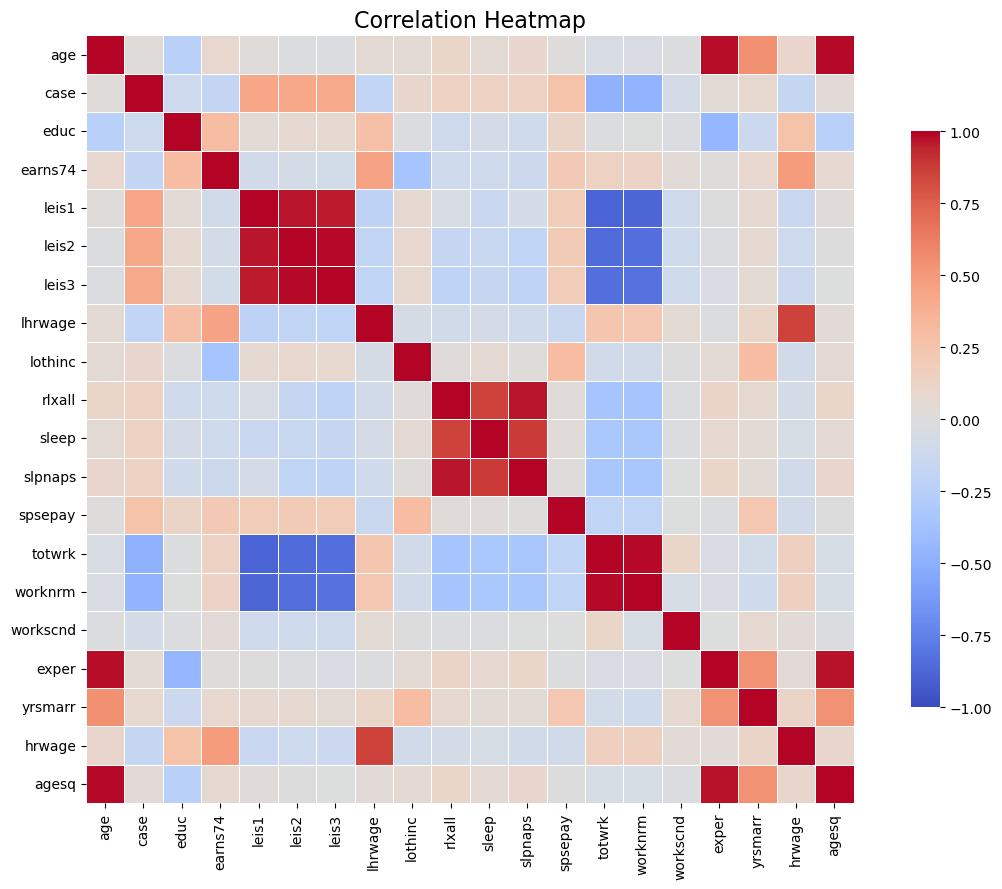

In [20]:
import matplotlib.pyplot as plt 
import seaborn as sns

binary_cols = [
    col for col in df_workers.columns 
    if set(df_workers[col].dropna().unique()) <= {0, 1}
]

df_no_binary = df_workers.drop(columns=binary_cols)

corr = df_no_binary.corr(numeric_only=True)
plt.figure(figsize=(12, 9))
sns.heatmap(corr, 
            annot=False,     
            fmt=".2f",          
            cmap="coolwarm",    
            vmin=-1, vmax=1,  
            square=True,       
            linewidths=0.5,     
            cbar_kws={"shrink": .75})  

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

We can see that sleep has the highest correlation with rlxall and slpnaps - which makes sense, as these two parameters were calculated using i.e. sleep time.
Otherwise, the highest correlation coefficient seems to be with totwrk and worknrm. Let's plot it and calculate the precise correlation coefficient.

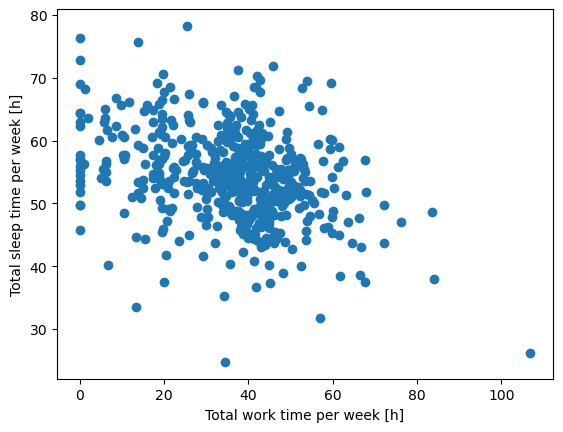

PearsonRResult(statistic=np.float64(-0.3240050961145081), pvalue=np.float64(1.8117963160130172e-14))


In [48]:
import scipy.stats as ss 

plt.scatter(df_workers['totwrk'], df_workers['sleep'])
plt.xlabel("Total work time per week [h]")
plt.ylabel("Total sleep time per week [h]")
plt.show()

correlation1 = ss.pearsonr(df_workers['sleep'], df_workers['totwrk'])
print(correlation1)

The pearson's correlation coefficient is -0.32, which means the relation is weak and negative. Let's plot the second relation:

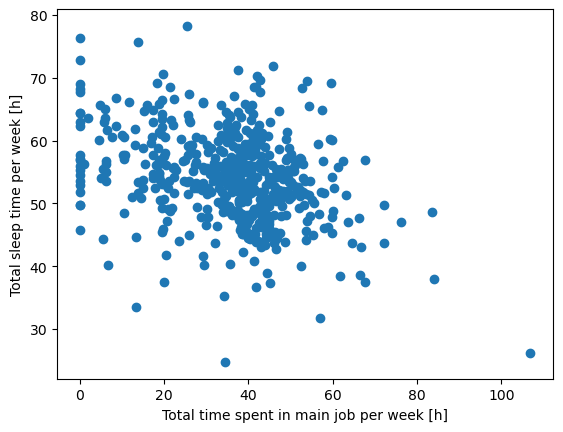

PearsonRResult(statistic=np.float64(-0.3230844048281091), pvalue=np.float64(2.1671390472366313e-14))


In [49]:
plt.scatter(df_workers['worknrm'], df_workers['sleep'])
plt.xlabel("Total time spent in main job per week [h]")
plt.ylabel("Total sleep time per week [h]")
plt.show()

correlation2 = ss.pearsonr(df_workers['sleep'], df_workers['worknrm'])
print(correlation2)

It makes sense that this plot is very similar to the first one, as total work and time spent in the main job are tightly correlated. We will focus only on the first one.  

Let's now examine the sleep vs hrwage relationship

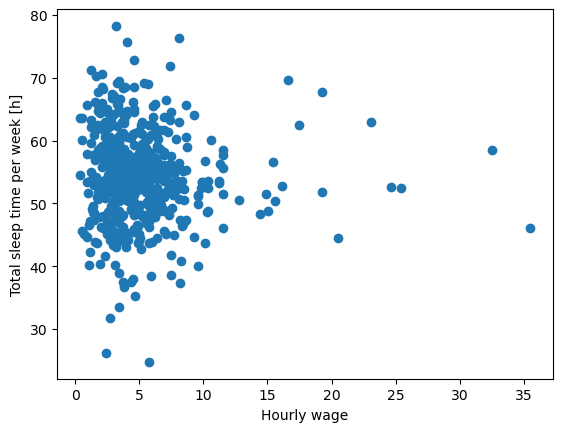

PearsonRResult(statistic=np.float64(-0.04945278601973278), pvalue=np.float64(0.254849788487443))


In [50]:
plt.scatter(df_workers['hrwage'], df_workers['sleep'])
plt.xlabel("Hourly wage")
plt.ylabel("Total sleep time per week [h]")
plt.show()

correlation3 = ss.pearsonr(df_workers['sleep'], df_workers['hrwage'])
print(correlation3)

The relationship is close to 0 - the majority of people earns low wages, which makes it difficult to capture the relationship. Transforming hrwage, i.e. logarithmically, might make the relationship more visible. We already have such a column in our dataframe.

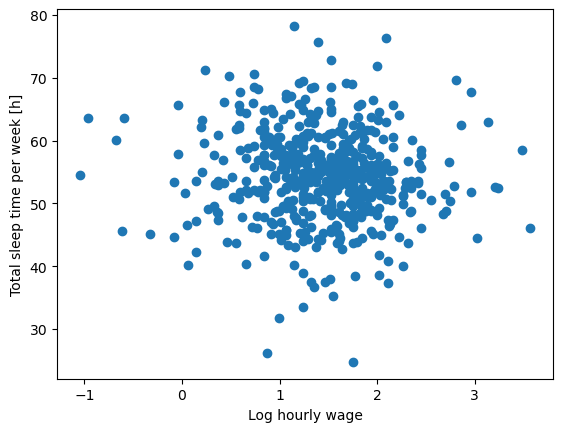

PearsonRResult(statistic=np.float64(-0.06721500528164952), pvalue=np.float64(0.12151943563002233))


In [51]:
plt.scatter(df_workers['lhrwage'], df_workers['sleep'])
plt.xlabel("Log hourly wage")
plt.ylabel("Total sleep time per week [h]")
plt.show()

correlation4 = ss.pearsonr(df_workers['sleep'], df_workers['lhrwage'])
print(correlation4)

We only stretched out the data, but it did not increase the linearity of our plot. This means that there is no clear trend between how much a person earns and how long it sleeps.   
I will now create a model, in which total work will be an explanatory variable and sleep will be a response variable.

In [39]:
import statsmodels.formula.api as smf

model = smf.ols(formula="sleep ~ totwrk", data=df_workers).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     62.17
Date:                Mon, 02 Jun 2025   Prob (F-statistic):           1.81e-14
Time:                        19:32:27   Log-Likelihood:                -1773.8
No. Observations:                 532   AIC:                             3552.
Df Residuals:                     530   BIC:                             3560.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.7109      0.744     80.240      0.0

The model that we got looks like this: y = 59.7109 - 0.1496x 

Let's display the diagnostic plot for this variable

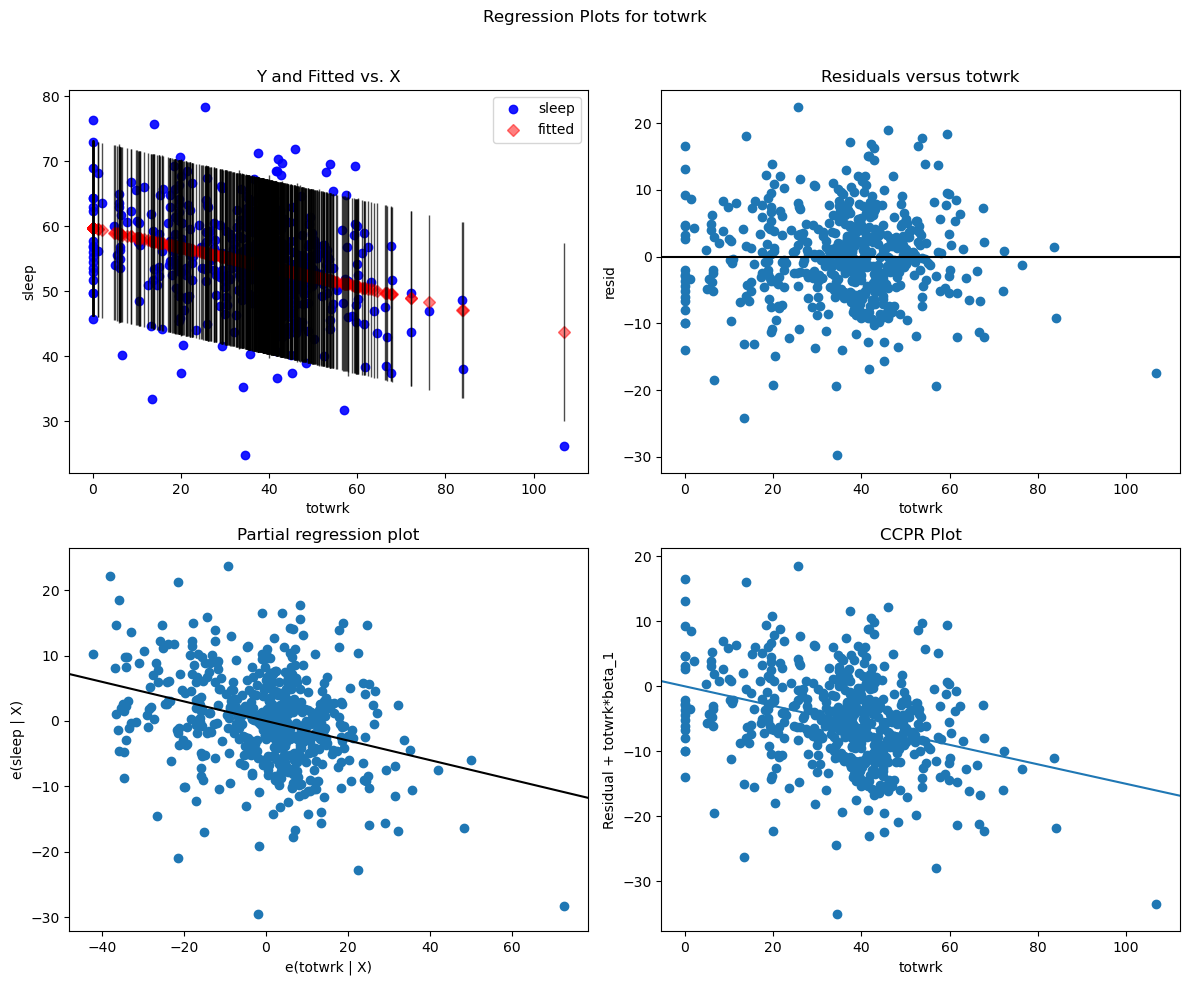

In [35]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12, 10))
sm.graphics.plot_regress_exog(model, 'totwrk', fig=fig)
plt.show()

The first plot confirms that there is a slight negative correlation between sleep and totwrk - it makes sense that those who work more have less time to sleep and vice versa.  
The second plot does not reveal any pattern - the scatter is rather random, which means that the simple linear line from the first graph captures most of that relationship accurately.  
The third and fourth plot show that when we take away the effect of other predictors, we'll still see a downward slope.

Let's see the outliers now:

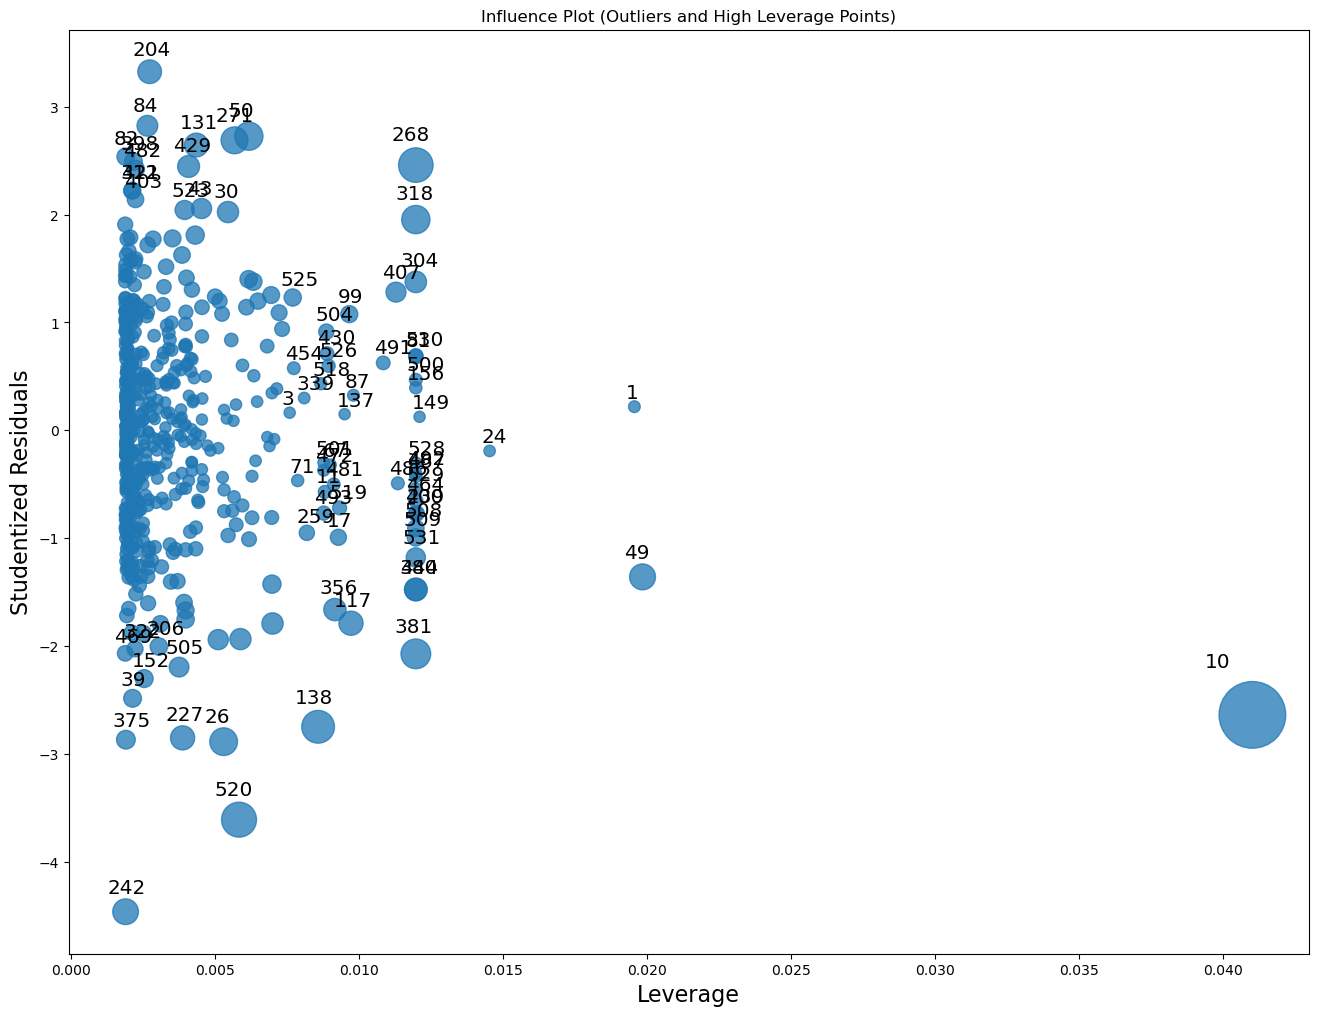

In [33]:
fig, ax = plt.subplots(figsize=(16, 12))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.title("Influence Plot (Outliers and High Leverage Points)")
plt.show()

Almost all observations have very low leverage (hᵢᵢ < 0.01). It means that most cases lie near the “typical” range of total work hours, so they do not individually pull the regression line much.  
The dot with 10 has disproportionate effect on the regression line and its studentized residual is around -2 / -3, so it is 2-3 standard deviations below what the model would predict.  
This plot suggests that dots like 10 or 242 might be outliers.

I will also examine the relationship between total sleep and each binary (0/1) variable in our dataset. To pick the most interesting candidate for the analysis, I computed a point-biserial correlation between “sleep” and every 0/1 column, then sorted by the absolute value of that correlation.  
I will use the dataset df_bool, which contained all cases, not just working people, as this analysis can be extended to the entire sample.

In [69]:
from scipy.stats import pointbiserialr

scores = []
for b in binary_cols:
    r, p = pointbiserialr(df_bool[b], df_bool["sleep"])
    scores.append((b, r, p))

# Convert to a DataFrame so we can sort by |r|
import pandas as pd
results = pd.DataFrame(scores, columns=["binary_col", "r_pb", "p_value"])
results["abs_r"] = results["r_pb"].abs()
results = results.sort_values("abs_r", ascending=False)

print(results.head(5))


   binary_col      r_pb   p_value     abs_r
3      gdhlth -0.102856  0.006231  0.102856
10      south  0.078592  0.036819  0.078592
5        smsa -0.067009  0.075187  0.067009
7        marr  0.053774  0.153489  0.053774
1    clerical  0.040592  0.281440  0.040592


'Good health' is the variable with the highest correlation to sleep - let's visualise it with a boxplot

/var/folders/x0/x7cf__n51m5g22m9ltzp4k4h0000gn/T/ipykernel_21692/1102341910.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


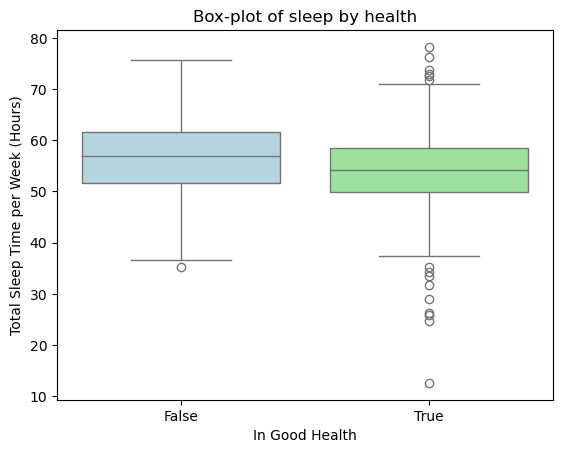

In [65]:
sns.boxplot(
    x="gdhlth",  
    y="sleep",              
    data=df_bool,                
    palette=["lightblue", "lightgreen"] 
);

# Label the axes
plt.xlabel("In Good Health");
plt.ylabel("Total Sleep Time per Week (Hours)");
plt.title("Box‐plot of sleep by health");
plt.show();

We see that the subset of people in good health contains many outliers. Let's get rid of them and then calculate some basic statistics for these two subsets:

In [66]:
import numpy as np 

df_badhealth = df_bool[df_bool['gdhlth'] == 0]
df_goodhealth = df_bool[df_bool['gdhlth'] == 1]

Q1 = df_goodhealth["sleep"].quantile(0.25)
Q3 = df_goodhealth["sleep"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_gh_no_outliers = df_goodhealth.loc[
    (df_goodhealth["sleep"] >= lower_bound) & (df_goodhealth["sleep"] <= upper_bound)
].copy()

For those in bad health:

In [67]:
median_b = np.median(df_badhealth['sleep'])
mean_b = np.mean(df_badhealth['sleep'])
std_b = np.std(df_badhealth['sleep'])

print("For those in bad health: mean - " + str(mean_b) + ", sd - " + str(std_b) +", median - " + str(median_b))

For those in bad health: mean - 56.6148051948052, sd - 8.098348334152572, median - 56.97


And for those in good health:

In [68]:
median_g = np.median(df_gh_no_outliers['sleep'])
mean_g = np.mean(df_gh_no_outliers['sleep'])
std_g = np.std(df_gh_no_outliers['sleep'])

print("For those in good health: mean - " + str(mean_g) + ", sd - " + str(std_g) +", median - " + str(median_g))

For those in good health: mean - 54.35843648208469, sd - 6.284119597758276, median - 54.25


For both groups, the median and mean are similar to one another.  
For those in good health, both median and mean are two hours lower than for those in bad health.  
The standard deviation is higher for people in bad health, which suggests their sleep patterns are slightly more spread than of those with good health.  
However, statistics and boxplots for both groups are very similar, so this variable is not a definite factor which determines how long people sleep per week.

## Conclusions

I started by cleaning our dataset. I ended up with a dataset that contained only workers as well as a set that contained all cases.
I analysed the influence of total work, hourly wage and health on total sleep time per week, using our workers' dataset. 
The correlation between total work and sleep turned out to be weak and negative, but it displayed the general trend that the more you work, the less you sleep.  
There was no correlation between neither hourly wage nor logarithmic hourly wage and sleep, so this parameter was not used in our model.  
Finally, out of all 0/1 variables we had, 'good health' turned out to have the largest point-biserial correlation with sleep. I used a set with all cases for this analysis. People in good health turned to sleep slightly shorter and their patterns were less spread out, but this value is not high enough to extrapolate and draw definite conclusions. 